# Project - 1 ( Titanic survival prediction )



## Installing and importing packages

In [39]:
!pip install pandas
!pip install numpy
!pip install matplot
!pip install seaborn
!pip install scikit-learn

You should consider upgrading via the '/opt/sagemath-9.3/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/sagemath-9.3/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/sagemath-9.3/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/sagemath-9.3/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/sagemath-9.3/local/bin/python3 -m pip install --upgrade pip' command.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

## Dataset

In [41]:
#import dataset
titanic_data = pd.read_csv('Desktop/titanic_dataset.csv')

In [42]:
#show dataset
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [43]:
#show first five rows of dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## dataset description

In [44]:
#datatype explanantion of the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [45]:
#dataset description
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [46]:
# dataset size
titanic_data.shape

(418, 12)

## data cleaning

In [47]:
# checking null values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [48]:
# filling null values with mean value of that column
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(),inplace=True)

In [49]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## data visualisation

In [50]:
#correlation matrix calculation 
result=titanic_data.corr()
result

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.030874,0.003818,0.043080,0.008209
Survived,-0.023245,1.000000,-0.108615,-0.000011,0.099943,0.159120,0.191382
Pclass,-0.026751,-0.108615,1.000000,-0.440782,0.001087,0.018721,-0.576619
Age,-0.030874,-0.000011,-0.440782,1.000000,-0.079535,-0.045073,0.326800
SibSp,0.003818,0.099943,0.001087,-0.079535,1.000000,0.306895,0.171488
Parch,0.043080,0.159120,0.018721,-0.045073,0.306895,1.000000,0.230001
Fare,0.008209,0.191382,-0.576619,0.326800,0.171488,0.230001,1.000000


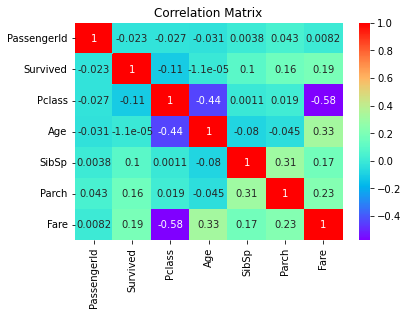

In [51]:
#correlation matrix represented as a heatmap
sns.heatmap(titanic_data.corr(),annot=True,cmap='rainbow')
plt.title('Correlation Matrix')
plt.show()

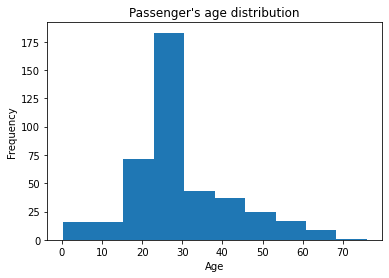

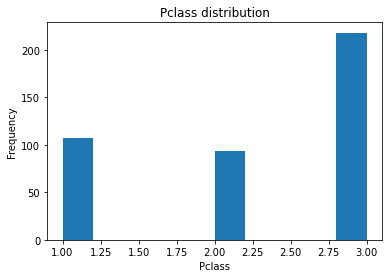

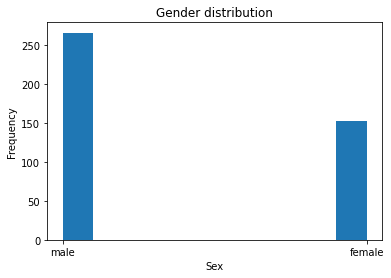

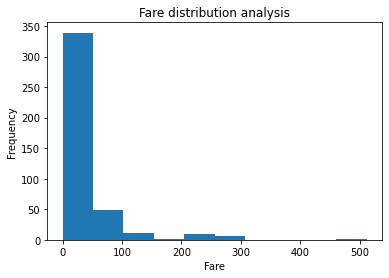

In [52]:
# Analyzing dataset parameters
plt.hist(titanic_data['Age'])
# Add title and labels
plt.title("Passenger's age distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
# Show the plot
plt.show()

plt.hist(titanic_data['Pclass'])
# Add title and labels
plt.title("Pclass distribution")
plt.xlabel('Pclass')
plt.ylabel('Frequency')
# Show the plot
plt.show()

plt.hist(titanic_data['Sex'])
# Add title and labels
plt.title("Gender distribution")
plt.xlabel('Sex')
plt.ylabel('Frequency')
# Show the plot
plt.show()

plt.hist(titanic_data['Fare'])
# Add title and labels
plt.title("Fare distribution analysis")
plt.xlabel('Fare')
plt.ylabel('Frequency')
# Show the plot
plt.show()

In [53]:
# calculating target(survival) count 
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survival rate of passengers')

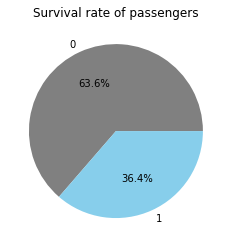

In [54]:
unique, counts = np.unique(titanic_data['Survived'], return_counts=True)

# Create pie chart
plt.pie(counts, labels=['0', '1'], autopct='%1.1f%%', colors=['grey', 'skyblue'])
plt.title('Survival rate of passengers')

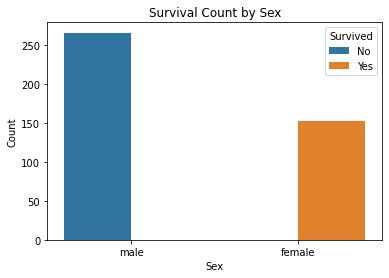

In [55]:
sns.countplot(x=titanic_data['Sex'],hue=titanic_data['Survived'])
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

## data splitting

In [56]:
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

In [57]:
#seperating data
x=titanic_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=titanic_data['Survived']

In [58]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         1
1         3    0  47.00000      1      0    7.0000         2
2         2    1  62.00000      0      0    9.6875         1
3         3    1  27.00000      0      0    8.6625         2
4         3    0  22.00000      1      1   12.2875         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         2
414       1    0  39.00000      0      0  108.9000         0
415       3    1  38.50000      0      0    7.2500         2
416       3    1  30.27259      0      0    8.0500         2
417       3    1  30.27259      1      1   22.3583         0

[418 rows x 7 columns]


In [59]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [60]:
#spliting of data

#train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=3)

## logistic regression

In [61]:
# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(x_train, y_train)

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred = logistic_model.predict(x_test)

In [63]:
print(y_pred)

[0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0
 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1]


## evaluate the model

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [65]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[104   0]
 [  0  64]]


In [66]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        64

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



## test model

### method-1

In [67]:
# providing input
new_data = pd.DataFrame({
    'Pclass': [3],
    'Sex': [0],
    'Age': [47],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.0],
    'Embarked': [2],
})
print(new_data)

   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0       3    0   47      1      0   7.0         2


In [68]:
# predict survival
prediction = logistic_model.predict(new_data)

# output prediction
print(prediction)
print('Prediction:', 'Survived' if prediction[0] == 1 else 'Did not survive')

[1]
Prediction: Survived


In [69]:
new_data1 = pd.DataFrame({
    'Pclass': [2],
    'Sex': [1],
    'Age': [22],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [45],
    'Embarked': [1],
})
print(new_data1)

   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0       2    1   22      1      0    45         1


In [70]:
# predict survival
prediction = logistic_model.predict(new_data1)

# output prediction
print(prediction)
print('Prediction:', 'Survived' if prediction[0] == 1 else 'Did not survive')

[0]
Prediction: Did not survive


### method-2

In [71]:
# Selecting an input from the dataset
input_data1 = x.iloc[0]
input_data2 = x.iloc[1]

print("data input[1]:")
print()
print(input_data1)
print()
print("data input[2]:")
print()
print(input_data2)

data input[1]:

Pclass       3.0000
Sex          1.0000
Age         34.5000
SibSp        0.0000
Parch        0.0000
Fare         7.8292
Embarked     1.0000
Name: 0, dtype: float64

data input[2]:

Pclass       3.0
Sex          0.0
Age         47.0
SibSp        1.0
Parch        0.0
Fare         7.0
Embarked     2.0
Name: 1, dtype: float64


In [72]:
# Predict survival
prediction1 = logistic_model.predict([input_data1])
prediction2 = logistic_model.predict([input_data2])

In [73]:
# Output prediction
print(prediction1)
print("Prediction of data input[1]:", "Survived" if prediction1[0] == 1 else "Did not survive")
print(prediction2)
print("Prediction of data input[2]:", "Survived" if prediction2[0] == 1 else "Did not survive")

[0]
Prediction of data input[1]: Did not survive
[1]
Prediction of data input[2]: Survived
